# Extremely weak-field Zeeman effect
**PHYS 475, Lecture 16, 2019.02.22**

Instructions:
(To answer questions, add a "markdown" cell and type your answers there.)

1. Check the constants to verify that they are correct for the hydrogen ground states
2. Derive the value of the atomic unit for magnetic field compared to Tesla.  (The answer is given below.)
2. Below in the cell beginning "next steps" is a function called np.kron().  What does this do?  Where have we seen this before?
3. Find the eigenstates in the small-B limit and the large-B limit by trying different values of B.  (Numerically, what are "small B" and "large B"?) Explain how to get these results from perturbation theory.
   * Bonus: If you have time, _do_ the perturbation calculations in the code and compare with the "exact" values done here.  There are two separate cases for perturbation theory: small B and large B.
4. Modify the code such that the magnetic field is in the x direction.  How does this change the eigenvalues?  How does this change the eigenstates?
5. The most common isotope of the alkali metal potassium (K-39) has nuclear spin I=3/2 and ground state hyperfine splitting of 462 MHz (in frequency units).  For K-39 the nuclear g-factor is gN = -1.4e-4.  Adapt the code to calculate the hyperfine states of K-39.  What is the value of A for this state?
6. Create a plot showing the B dependence of the energy eigenvalues of K-39 for fields in the z direction.
7. The homework problem looks at deuterium.  What changes in the code to do this atom?

## Answer Key

1.  Yes, everything checks out.
2.  The right combination of atomic constants to make something with dimensions of magnetic field is
$$ 1 \text{atomic unit of magnetic field} = \frac{\hbar}{e a_0^2} = 2.35\times10^5\,\mathrm{T}.$$
This is _huge_.  The largest magnets we can build in the lab only go up to about 20 T.
3.  Typing `help(np.kron)` into python tells us that the function is the "Kroenecker product".  We've seen the before, but we didn't use the proper name.  The Kroenecker product is a way of representing tensor products as matrices.  It isn't equivalent because it breaks some of the algebra rules of tensor products, but it is good enough for the calculations we are doing here.  If we have two operators in different spaces and take their tensor product, we can represent this by a new matrix
$$
A \otimes B \sim \begin{pmatrix} a_{11} B & a_{12} B & \cdots \\ a_{21} B & a_{22} B & \cdots \\ \vdots & \vdots & \ddots \end{pmatrix},
$$
where $a_{rc}$ are the elements of the matrix representation of $A$, and $B$ on the right is an entire copy of the matrix representation of $B$.  We use this tool to make the matrices for our operators in the joint space of $S$ and $I$, with basis vectors $\lvert m_s, m_I \rangle$.
4.  You can check this by picking appropriate values of $B$.  For the weak field case, just use $B=0$.  This gives you the eigenvectors
$$
\begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix},
\begin{pmatrix} 0 \\ 1/\sqrt{2} \\ 1/\sqrt{2} \\ 0 \end{pmatrix},
\begin{pmatrix} 0 \\ 1/\sqrt{2} \\ -1/\sqrt{2} \\ 0 \end{pmatrix},
\begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}.
$$
(The order of the eigenvectors and overall signs may be different.)  By putting these back into Dirac form, we can recognize these states as the $\lvert F, m_F \rangle$ states for $F=0,1$ and the possible $m_F$ values.
To get into the strong field regime, you need something like *B* > 1e-4 (a.u.).  As _B_ increases, the eigenvectors approach the unit vectors in this basis, which is the $\lvert m_s, m_I \rangle$ basis.
5.  In the definition of `ZnoB` below, just replace Sz with Sx and Iz with Ix.  This will change the eigenvectors, but the *eigenvalues are exactly the same*.
6.  The needed changes are to update the value of I and gN and to replace the equation for A with the given frequency rewritten in atomic units:
$$
A\,\text{(a.u.)} = 462\times10^6\,\mathrm{Hz} (2\pi \hbar)/E_H = 7.025\times10^{-8}, \quad(\text{Wrong!})
$$
Running the code with this value of A gives a final splitting at B = 0 that is 2 times too big.  What we need to do is divide A by 2 to match the experimental data.  (This factor of 2 is actually the maximum value of *F*, but we need the Wigner-Ekhart Theorem to prove that.)  So, the proper value is 
$$
A\,\text{(a.u.)} = 462\times10^6\,\mathrm{Hz} (2\pi \hbar)/E_H/2 = 3.512\times10^{-8} \quad(\text{Correct!}).
$$
(Note, the value of gN in the original problem was incorrect because of a units error.  The true value is the given value times the proton mass in a.u., so it should have been gN = 0.257.)
7.  With the above changes, the code should run and give you the correct plots.
8.  For deuterium, make similar changes to those you made for the K-39 case.

### Bonus problem
The perturbation theory results for the hydrogen atom problem are below in the code.  I've also added them to the plots so that you can see the comparision.  Note that the perturbation calculations as I've written them here are *only good for hydrogen*, so they may fail or give bad results if you change the value of I.

One thing to note is that the perturbation theory agrees with the exact solution for two of the states, $\lvert m_s\!\!=\!\!+\tfrac12, m_I\!\!=\!\!+\tfrac12 \rangle = \lvert F\!\!=\!\!1, m_F\!\!=\!\!1\rangle$ and $\lvert m_s\!\!=\!\!-\tfrac12, m_I\!\!=\!\!-\tfrac12 \rangle = \lvert F\!\!=\!\!1, m_F\!\!=\!\!-1\rangle$.  These are the two "stretched" states.  In general these states will be exactly solved by perturbation theory because they are eigenstates of both the hyperfine and Zeeman operators (and also, the fine structure operator).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

%matplotlib inline
np.set_printoptions(precision=3, floatmode='maxprec')
#assuming atomic units throughout unless specified

In [2]:
# set colors for plots
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']


In [3]:
#constants
alpha=1./137.; # fine structure constant
mp = 1836.; # proton mass
muB = 0.5; #Bohr magneton
muN = muB/mp; #nuclear magneton
mu0 = 4*np.pi*alpha**2; #permeability of vacuum
gs = 2.0; # electron spin gyromagnetic ratio
psi0 = 1/np.sqrt(np.pi); #value of wavefunction at origin
h = 4.136e-15; #Planck's constant in eV s
EH = 27.2; #Hartree energy in eV
B0 = 2.35e5; #atomic unit of magnetic field in T

In [4]:
# Properties of this atom (hydrogen)
S=1/2; I=1/2;
gN = 5.59;# nuclear gyromagnetic ratio (depends on atom and isotope)
#gN = -1.4e-4*mp; # for the K-39 problem
#hyperfine amplitude coefficient (depends on atom and state)
A = 2*mu0/3*gs*muB*gN*muN*psi0**2 # McIntyre Eq. 11.10
#A = 7.025e-8/2 # for the K-39 problem
print(f"A = {A:.2e} (a.u.) = {A*EH/h/1e6:.2f} MHz") # display A in MHz to compare with McIntyre Fig. 11.4

A = 2.16e-07 (a.u.) = 1422.41 MHz


In [5]:
#degeneracy of S and I.
#Must round so that these are stored as integers (the extra 0.2 is to ensure the rounding goes to the right number)
degS = np.int(2*S+1.2); degI = np.int(2*I+1.2); 

In [6]:
#create lists of possible Sz, Iz values in decreasing order
Szlist = np.arange(S,-S-1,-1);
Izlist = np.arange(I,-I-1,-1);

In [7]:
#Generating the individual spin matrices in the uncoupled basis
S2 = S*(S+1)*np.matrix(np.eye(degS)); #S-squared matrix
I2 = I*(I+1)*np.matrix(np.eye(degI)); #I-squared matrix
Sz = np.matrix(np.diag(Szlist)); #Sz matrix
Iz = np.matrix(np.diag(Izlist)); #Iz matrix

In [8]:
# list of the basis state  labels |Sz,Iz>
basislist = np.column_stack((np.diagonal(np.kron(Sz,np.eye(degI))),np.diagonal(np.kron(np.eye(degS),Iz)))); 

In [9]:
print(basislist) # display the row labels, (Sz, Iz) basis

[[ 0.5  0.5]
 [ 0.5 -0.5]
 [-0.5  0.5]
 [-0.5 -0.5]]


In [10]:
# Generate other spin matrices
Sp=np.matrix(np.diag(np.sqrt(S*(S+1)-(Szlist*(Szlist+1))[1:]),1)); #S+ ladder matrix
Ip=np.matrix(np.diag(np.sqrt(I*(I+1)-(Izlist*(Izlist+1))[1:]),1)); #I+ ladder matrix
Sm=Sp.H; #S- ladder matrix
Im=Ip.H; #I- ladder matrix
Sx=(Sp+Sm)/2;
Ix=(Ip+Im)/2;
Sy=(Sp-Sm)/(0.+2j); #Sy matrix ("j" is sqrt(-1))
Iy=(Ip-Im)/(0.+2j);

The next cell builds the matrices for the Hamiltonian operators.

Being explicit with the tensor products, the hyperfine energy operator is
$$
\begin{aligned}
\hat{H}_\textrm{HF} &= A\,\hat{\mathbf{S}}\cdot\hat{\mathbf{I}} = A\,(\hat{\mathbf{S}}\otimes\hat{1}_I)\cdot(\hat{1}_S\otimes\hat{\mathbf{I}})\\
&= A \Bigl(\hat{S}_z\otimes\hat{I}_z +\tfrac12 (\hat{S}_+\otimes\hat{I}_- +\hat{S}_-\otimes\hat{I}_+)\Bigr),
\end{aligned}
$$
and the Zeeman energy operator is
$$
\hat{H}_\textrm{Z} = B(g_s \mu_B \hat{S}_z\otimes\hat{1}_I + g_N \mu_N \hat{1}_S\otimes\hat{I}_z),
$$
where the identity operators in the corresponding space are represented by $\hat{1}_{S}$ and $\hat{1}_{I}$.

In [11]:
# next steps: build hyperfine operator matrix and zeeman operator matrix
# We are assuming l=0 states here (otherwise HF is more complicated)

# hyperfine operator = A*(S dot I)
HF = A*(np.kron(Sz,Iz)+0.5*(np.kron(Sm,Ip)+np.kron(Sp,Im)));
# Zeeman operator, except for the magnetic field magnitude
ZnoB = gs*muB*np.kron(Sz,np.eye(degI))+gN*muN*np.kron(np.eye(degS),Iz); #multiply this by B to get the Zeeman operator
# magnetic field magnitude in atomic units:
B=0; # Change this value to test different magnetic field strengths
# Total hamiltonian
H = HF+B*ZnoB;

In [12]:
# print the Hamiltonian matrix
print(H)

[[ 5.407e-08  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00 -5.407e-08  1.081e-07  0.000e+00]
 [ 0.000e+00  1.081e-07 -5.407e-08  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00  5.407e-08]]


In [13]:
#calculate and display the eigenvalues and eigenstates of H for this value of B
evs, ess = np.linalg.eigh(H) 
print(f"The eigenvalues are {evs}.")
print(f"The eigenvectors are the columns of the matrix:\n{ess}.")

The eigenvalues are [-1.622e-07  5.407e-08  5.407e-08  5.407e-08].
The eigenvectors are the columns of the matrix:
[[ 0.     1.     0.     0.   ]
 [ 0.707  0.     0.     0.707]
 [-0.707  0.     0.     0.707]
 [ 0.     0.     1.     0.   ]].


In [14]:
# maximum frequency splitting in MHz
(max(evs)-min(evs))*EH/h/1e6 

1422.411016622688

In [15]:
# Generate data for the plots by stepping through B values.
Bmin = 0; # minimum B in atomic units
Bmax = 1e-6; # maximum B in atomic units
Bsteps = 101 # number of steps
Blist = np.linspace(Bmin, Bmax, Bsteps) # generate list of B values to evaluate
Elist = []; #empty list to store energy eigenvalues
for B in Blist:
    H = HF+B*ZnoB;
    evs, ess = np.linalg.eigh(H)
    Elist.append(np.sort(evs))
Earray = np.array(Elist)

The perturbation theory solution for weak B field is
$$
\begin{aligned}
E_{F=1, m_F} &\approx \frac{A}{4} + \frac12 (g_s \mu_B + g_N \mu_n)m_F B \\
E_{F=0, m_F=0} & \approx -\frac{3A}{4}
\end{aligned}
$$

In [16]:
# hydrogen weak field PT
Ew_HF = np.array([-0.75*A, A/4., A/4., A/4.])
Ew_ZnoB = np.array([0.,1.,0.,-1.])*(gs*muB+gN*muN)/2.
Ew_list = [];
for B in Blist:
    H = Ew_HF+B*Ew_ZnoB;
    Ew_list.append(H)
Ew_array = np.array(Ew_list)

The perturbation theory solution for strong B field is
$$
\begin{aligned}
E_{m_s, m_I} &\approx m_s m_I A + (g_s \mu_B m_s + g_N \mu_n m_I)B
\end{aligned}
$$

In [17]:
# hydrogen strong field perturbation theory solution
ms = basislist[:,0];
mI = basislist[:,1];
Es_HF = A*ms*mI;
Es_ZnoB = gs*muB*ms+gN*muN*mI;
Es_list=[];
order = [2,1,0,3];
for B in Blist:
    Ht = Es_HF+B*Es_ZnoB;
    H = np.array([Ht[2],Ht[3],Ht[1],Ht[0]])
    Es_list.append(H)
Es_array = np.array(Es_list)

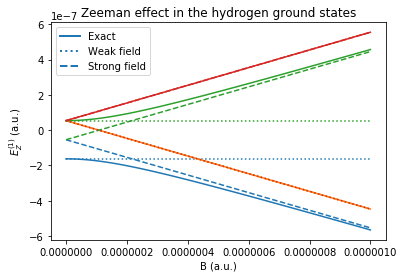

In [18]:
# plot the energy correction as a function of magnetic field amplitude
# If you want to do atoms other than hydrogen, comment out the two lines labeled "hydrogen PT" below.
for x in range(degS*degI):
    plt.plot(np.array(Blist), Earray[:,x], color=colors[x], linestyle='-')
    plt.plot(np.array(Blist), Ew_array[:,x], color=colors[x], linestyle=':') # hydrogen PT weak
    plt.plot(np.array(Blist), Es_array[:,x], color=colors[x], linestyle='--') # hydrogen PT strong
plt.xlabel("B (a.u.)");
plt.ylabel("$E^{(1)}_Z$ (a.u.)");
plt.title("Zeeman effect in the hydrogen ground states");
# generate useful legend for the plot
custom_lines = [Line2D([0], [0], color=colors[0], lw=2, linestyle='-'),
                Line2D([0], [0], color=colors[0], lw=2, linestyle=':'),
                Line2D([0], [0], color=colors[0], lw=2, linestyle='--')]
plt.legend(custom_lines, ['Exact', 'Weak field', 'Strong field'])
#plt.savefig("Zeeman-H-au.pdf")

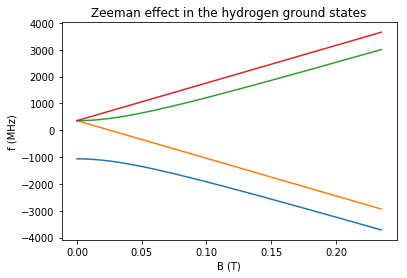

In [19]:
for x in range(degS*degI):
    plt.plot(np.array(Blist)*B0, Earray[:,x]*EH/h/1e6) # convert units to T and MHz
plt.xlabel("B (T)");
plt.ylabel("f (MHz)");
plt.title("Zeeman effect in the hydrogen ground states");
#plt.savefig("Zeeman-H-SI.pdf")